### Messing around with plots
This works best for my by running
`jupyter notebook viz_exploratory` from command line
and ensuring that the same file is NOT open in pycharm.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
from data import api_requests, dbclient, soda_data,\
    daily_case_data_by_zip_pull, data_transformations

In [10]:
# assume vaccine data is in database
db = dbclient.DBClient()
zipcode_to_test = '60637'
query = f"select zip_code, date, AVG7DAY_total_doses_daily from VACCINATIONS_DAILY where zip_code = '{zipcode_to_test}'"
zipcode_vax_weekly = pd.read_sql_query(query, db.conn)
zipcode_vax_weekly.head()

,zip_code,date,AVG7DAY_total_doses_daily
0,60637,2020-12-15T00:00:00.000,NaN
1,60637,2020-12-16T00:00:00.000,NaN
2,60637,2020-12-17T00:00:00.000,NaN
3,60637,2020-12-18T00:00:00.000,NaN
4,60637,2020-12-19T00:00:00.000,NaN


In [6]:
# all vaccine data (get from api)

# daily_vacc_data = soda_data.datasets["COVID-19 Vaccinations by ZIP Code"]

# api_resp = api_requests.SocrataAPIClient(daily_vacc_data.request_url)  # 2
# api_resp.convert_dtypes()  # 3
# data_transformations.\
#         compute_moving_avg_from_daily_data(api_resp.data_df,
#                                            'zip_code',  # should store this
#                                            'date',  # this too
#                                            daily_vacc_data.week_avg_attr_list) 
# vacc_df = api_resp.data_df
# vacc_df.head()

,zip_code,date,total_doses_daily,total_doses_cumulative,vaccine_series_completed_daily,vaccine_series_completed_percent_population,population,AVG7DAY_total_doses_daily,AVG7DAY_vaccine_series_completed_daily
2369,60652,2020-12-15T00:00:00.000,1,1,0,0.0,43447,NaN,NaN
3187,60624,2020-12-15T00:00:00.000,0,0,0,0.0,34892,NaN,NaN
3345,60646,2020-12-15T00:00:00.000,0,0,0,0.0,28569,NaN,NaN
3434,60660,2020-12-15T00:00:00.000,0,0,0,0.0,44498,NaN,NaN
3442,60616,2020-12-15T00:00:00.000,0,0,0,0.0,54197,NaN,NaN


### matplotlib

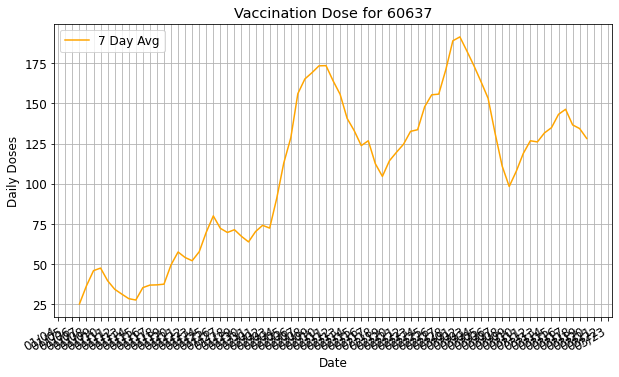

In [13]:
%matplotlib inline

title_str = f"Vaccination Doses for {zipcode_to_test}"
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(zipcode_vax_weekly.date, zipcode_vax_weekly.AVG7DAY_total_doses_daily, color='orange', linestyle='solid', label='7 Day Avg')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Daily Doses')
ax.set_title(title_str)
ax.grid(True)
ax.legend(loc='upper left');
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
fig.autofmt_xdate()